In [106]:
import os
MAYA_RAW_SAVE_PATH = "/Users/sebastian.khan/personal/data/MAYAWAVES_RAW_2024"
os.makedirs(MAYA_RAW_SAVE_PATH, exist_ok=True)

In [107]:
# lvcnr data dir
MAYA_SAVE_PATH = "/Users/sebastian.khan/personal/data/MAYAWAVES_2024"

In [108]:
from mayawaves.utils.catalogutils import Catalog
from mayawaves.utils.catalogutils import Parameter as p

In [109]:
from mayawaves.utils.postprocessingutils import get_stitched_data
import matplotlib.pyplot as plt
import numpy as np

In [110]:
catalog = Catalog()


In [111]:
# we will compare the raw simulation data with the lvc-nr format data
# for the simulation GT0905
# an equal-mass, non-spinning simulation

In [112]:
# download raw
# catalog.download_waveforms(['GT0905'], save_wf_path = MAYA_RAW_SAVE_PATH)
# 

In [113]:
!ls /Users/sebastian.khan/personal/data/MAYAWAVES_RAW_2024/

GT0905.h5


In [114]:
# /Users/sebastian.khan/personal/data/MAYAWAVES_2024/GT0905.h5

In [115]:
from mayawaves.coalescence import Coalescence
from mayawaves.utils.postprocessingutils import export_to_lvcnr_catalog, export_to_lal_compatible_format

In [116]:
# export_to_lal_compatible_format(coalescence, output_direcory, extraction_radius=75, NR_group='UT Austin', NR_code='MAYA', bibtex_keys='Jani:2016wkt', contact_email='email@email.com')


In [117]:
    # time, h_plus, h_cross = coalescence.strain_for_mode(l=2, m=2, extraction_radius=extraction_radius)


In [118]:
coalescence = Coalescence("/Users/sebastian.khan/personal/data/MAYAWAVES_RAW_2024/GT0905.h5")

In [119]:
coalescence.included_extraction_radii

[30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 75.0,
 80.0,
 90.0,
 100.0,
 115.0,
 130.0,
 145.0,
 160.0,
 175.0,
 190.0,
 200.0]

In [120]:
coalescence.strain_for_mode(2, 2, extraction_radius=200)

(array([0.000e+00, 1.000e-01, 2.000e-01, ..., 9.988e+02, 9.989e+02,
        9.990e+02]),
 array([-9.54723370e-04, -9.57374555e-04, -9.60008195e-04, ...,
         4.67916188e-18,  4.31239886e-18,  4.01005096e-18]),
 array([ 3.63065272e-04,  3.55965239e-04,  3.48844983e-04, ...,
        -1.89936492e-18, -1.71345320e-18, -1.55905393e-18]))

In [121]:
coalescence.strain_for_mode(2, 2)

/opt/homebrew/Caskroom/miniforge/base/envs/lmfit/lib/python3.10/site-packages/mayawaves/radiation.py:109: UserWarning: Using data extrapolated from 75.0M for radius extrapolation. You can set this manually by setting radius_for_extrapolation
  warnings.warn(


(array([0.000e+00, 1.000e-01, 2.000e-01, ..., 9.988e+02, 9.989e+02,
        9.990e+02]),
 array([-2.13666067e-03, -2.16263753e-03, -2.18867692e-03, ...,
         4.24286534e-38,  4.32462415e-38,  4.40056375e-38]),
 array([ 6.38945676e-03,  6.37702836e-03,  6.36432706e-03, ...,
        -1.32400591e-37, -1.33036083e-37, -1.33463584e-37]))

In [122]:
times22 = {}
h22 = {}
for radius in coalescence.included_extraction_radii:
    t_, h22re_, h22im_ = coalescence.strain_for_mode(2,2, extraction_radius=radius)
    times22[radius] = t_
    h22[radius] = h22re_ + 1.j * h22im_

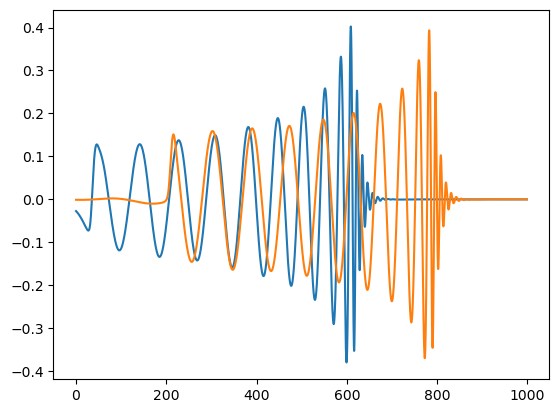

In [123]:
plt.figure()
plt.plot(times22[30.0], h22[30.0].real)
plt.plot(times22[200.0], h22[200.0].real)

In [124]:
radius=200.0
# radius=0

In [125]:
t22, _, phi22 = coalescence.psi4_amp_phase_for_mode(2, 2, extraction_radius=radius)
t32, _, phi32 = coalescence.psi4_amp_phase_for_mode(3, 2, extraction_radius=radius)

In [126]:
# mask = t22 > 150
# t22 = t22[mask]
# phi22 = phi22[mask]
# phi32 = phi32[mask]

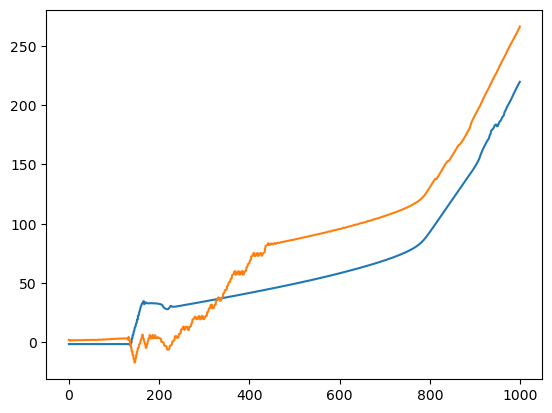

In [127]:
plt.plot(t22, phi22)
plt.plot(t22, phi32)

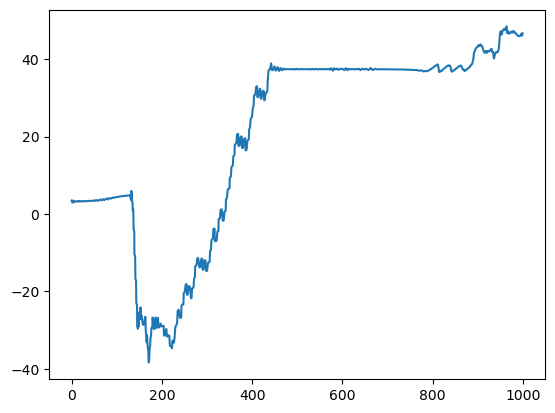

In [128]:
plt.plot(t22, phi32-phi22)

In [129]:
t22_, h22re_, h22im_ = coalescence.strain_for_mode(2,2, extraction_radius=radius)
h22 = h22re_ - 1.j * h22im_
t32_, h32re_, h32im_ = coalescence.strain_for_mode(3,2, extraction_radius=radius)
h32 = h32re_ - 1.j * h32im_

In [130]:
# # for radius = 200
mask = (t22_ > 400) & (t22_ < 850)
# for radius = 0
# mask = (t22_ > 400) & (t22_ < 750)
t22_ = t22_[mask]
t32_ = t32_[mask]
h22 = h22[mask]
h32 = h32[mask]

In [131]:
phi22 = np.unwrap(np.angle(h22))
phi32 = np.unwrap(np.angle(h32))

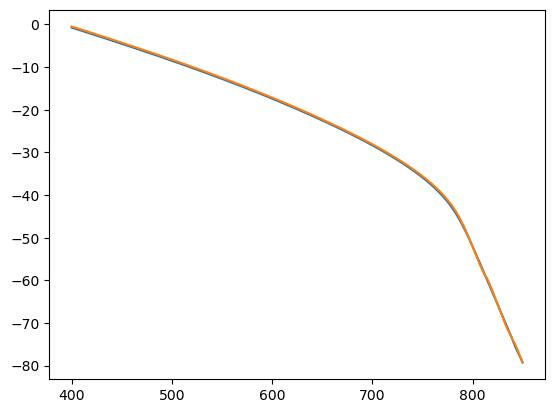

In [132]:
plt.plot(t22_, phi22)
plt.plot(t32_, phi32)

In [133]:
# for radius = 200
# mask = (t22_ > 400) & (t22_ < 850)
# for radius = 0
# mask = (t22_ > 400) & (t22_ < 750)
# t22_ = t22_[mask]
# phi22 = phi22[mask]
# phi32 = phi32[mask]

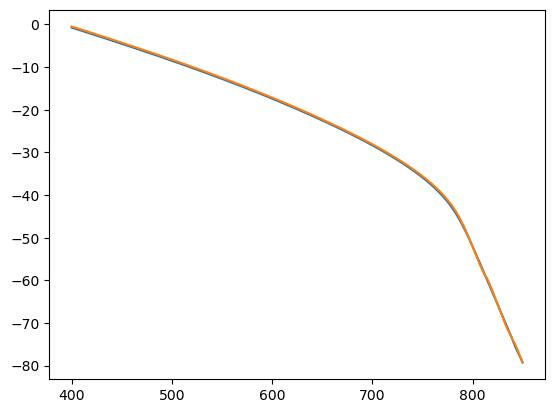

In [134]:
plt.plot(t22_, phi22)
plt.plot(t22_, phi32)

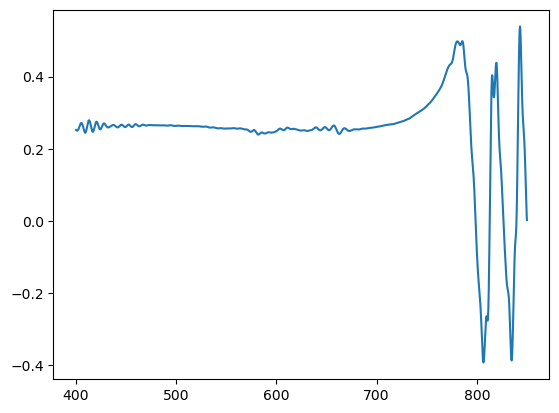

In [135]:
plt.plot(t22_, (phi32 - phi22))

In [136]:
import h5py

In [137]:
with h5py.File("/Users/sebastian.khan/personal/data/MAYAWAVES_2024/GT0905.h5", 'r') as f:
    lvcnr_t = np.array(f['NRtimes'])
    phi22_x = np.array(f['phase_l2_m2']['X'])
    phi22_y = np.array(f['phase_l2_m2']['Y'])
    phi32_x = np.array(f['phase_l3_m2']['X'])
    phi32_y = np.array(f['phase_l3_m2']['Y'])

In [138]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [139]:
lvcnr_t = lvcnr_t[lvcnr_t<100]

In [140]:
lvcnr_phi22 = IUS(phi22_x, phi22_y)(lvcnr_t)
lvcnr_phi32 = IUS(phi32_x, phi32_y)(lvcnr_t)

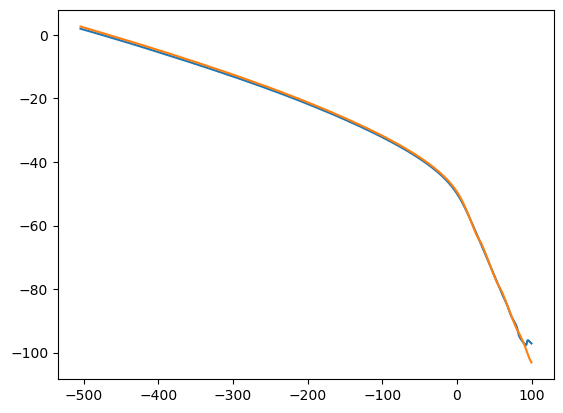

In [141]:
plt.plot(lvcnr_t, lvcnr_phi22)
plt.plot(lvcnr_t, lvcnr_phi32)

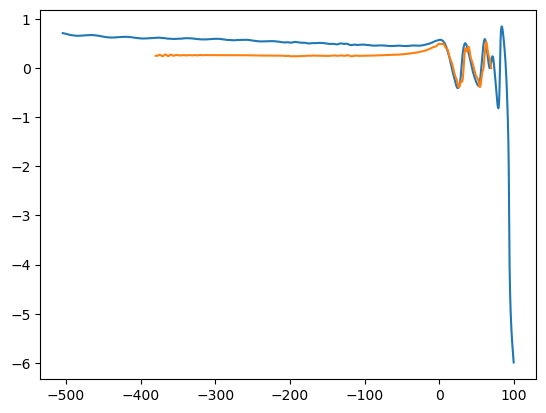

In [142]:
plt.plot(lvcnr_t, lvcnr_phi32-lvcnr_phi22)
plt.plot(t22_-780, (phi32 - phi22))

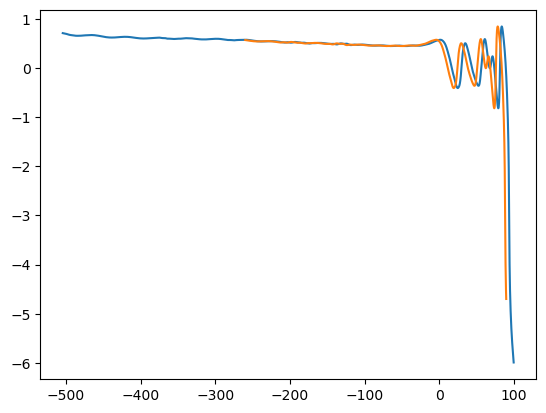

In [105]:
y0 = lvcnr_phi32 - lvcnr_phi22
y1 = phi32 - phi22
plt.plot(lvcnr_t, y0)
plt.plot(t22_-660, y1)